# 1(a)

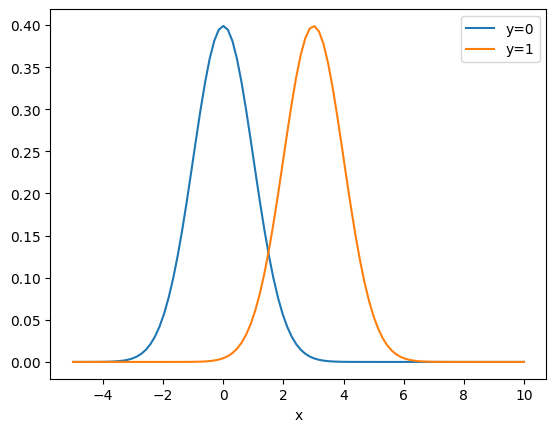

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-5,10,100)

mu1 = 0
var1 = 1
pdf1 = norm.pdf(x, mu1, np.sqrt(var1))

mu2 = 3
var2 = 1
pdf2 = norm.pdf(x, mu2, np.sqrt(var2))

plt.plot(x,pdf1,label="y=0")
plt.plot(x,pdf2,label="y=1")
plt.legend()

plt.xlabel('x')
plt.show()

# 1(b)

\begin{align*}
    p(y|x) 
    &= \frac{p(x|y)p(y)}{p(x)} \\
    &= \frac{p(x|y)p(y)}{\sum_{i}p(x|y_i)p(y_i)} \\
    &= \frac{p(x|y)p(y)}{(3/4)p(x|y=0)+(1/4)p(x|y=1)} \\
\end{align*}

# 1(c)

In [6]:
# p(y=0|x=1.5)
print(f"p(y=0|x=1.5) = {norm.pdf(1.5, mu1, np.sqrt(var1))*(3/4) / ( norm.pdf(1.5, mu1, np.sqrt(var1))*(3/4) + norm.pdf(1.5, mu2, np.sqrt(var2))*(1/4) )}")
print(f"p(y=0|x=1.5) = {norm.pdf(1.5, mu2, np.sqrt(var2))*(1/4) / ( norm.pdf(1.5, mu1, np.sqrt(var1))*(3/4) + norm.pdf(1.5, mu2, np.sqrt(var2))*(1/4) )}")

p(y=0|x=1.5) = 0.75
p(y=0|x=1.5) = 0.25


# 1(d)

We want a value $x$ such that $(3/4)p(x|y=0)+(1/4)p(x|y=1)$, which means $3p(x|y=0)=p(x|y=1)$, in which we will numerically search for it

In [47]:
def error(x):
    eps = 1e-7
    diff = norm.pdf(x, mu1, np.sqrt(var1)+3*eps)/norm.pdf(x, mu2, np.sqrt(var2)+eps)
    return (diff-3)**2

from scipy.optimize import fsolve
import warnings
warnings.filterwarnings("ignore")
sol = fsolve(error, [0, 5])[0]
print(f"The solution is x={sol} with an error of {error(sol)}")

The solution is x=1.1337958495555636 with an error of 1.5301949623585273e-20


# 1(e)

We can make the first argument because $p(x)$ is invariant on $y$. The log argument can be made because the logarithm function is strictly increasing.

# 1(f)

We know that around $x=1.1338$ has equal probability for $p(y=0|x)$ and $p(y=1|x)$. Therefore, we should classify $x<1.1338$ to the class $y=0$, and the rest to $y=1$